취업자수(시도)
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1DA7030S&conn_path=I2

In [134]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [135]:
employment_count = pd.read_csv('../Data/00. 취업자수(시도).csv', encoding='euc-kr', index_col='시점')
employment_count.head()

,계,계.1,계.2,서울특별시,서울특별시.1,서울특별시.2,부산광역시,부산광역시.1,부산광역시.2,대구광역시,...,전라남도.2,경상북도,경상북도.1,경상북도.2,경상남도,경상남도.1,경상남도.2,제주도,제주도.1,제주도.2
시점,,,,,,,,,,,,,,,,,,,,,
시점,계,남자,여자,계,남자,여자,계,남자,여자,계,...,여자,계,남자,여자,계,남자,여자,계,남자,여자
2022,28089,15928,12161,5113,2759,2355,1679,935,744,1228,...,445,1462,850,612,1740,1009,732,402,215,187
2021,27273,15548,11725,5055,2736,2319,1657,922,736,1217,...,428,1410,829,581,1732,1005,726,383,207,176
2020,26904,15381,11523,5051,2747,2305,1640,910,730,1184,...,423,1418,832,587,1729,1011,719,378,203,176
2019,27123,15463,11660,5086,2774,2313,1676,927,749,1219,...,425,1430,834,596,1749,1027,721,382,209,173


In [136]:
employment_count.tail()

,계,계.1,계.2,서울특별시,서울특별시.1,서울특별시.2,부산광역시,부산광역시.1,부산광역시.2,대구광역시,...,전라남도.2,경상북도,경상북도.1,경상북도.2,경상남도,경상남도.1,경상남도.2,제주도,제주도.1,제주도.2
시점,,,,,,,,,,,,,,,,,,,,,
2004,22682,13276,9406,4917,2830,2087,1628,946,681,1168,...,426,1363,759,604,1492,871,621,281,150,131
2003,22222,13090,9131,4811,2808,2003,1619,950,669,1143,...,437,1363,760,604,1466,843,623,282,152,130
2002,22232,12988,9243,4807,2816,1991,1710,980,730,1153,...,456,1379,770,609,1412,830,582,273,142,131
2001,21614,12609,9005,4736,2768,1967,1648,949,699,1118,...,450,1375,766,609,1387,798,589,265,139,126
2000,21173,12401,8772,4668,2744,1925,1633,945,688,1092,...,441,1368,761,607,1361,784,577,261,138,123


In [137]:
employment_count.columns.unique()

Index(['계', '계.1', '계.2', '서울특별시', '서울특별시.1', '서울특별시.2', '부산광역시', '부산광역시.1',
       '부산광역시.2', '대구광역시', '대구광역시.1', '대구광역시.2', '인천광역시', '인천광역시.1', '인천광역시.2',
       '광주광역시', '광주광역시.1', '광주광역시.2', '대전광역시', '대전광역시.1', '대전광역시.2', '울산광역시',
       '울산광역시.1', '울산광역시.2', '세종특별자치시', '세종특별자치시.1', '세종특별자치시.2', '경기도',
       '경기도.1', '경기도.2', '강원도', '강원도.1', '강원도.2', '충청북도', '충청북도.1', '충청북도.2',
       '충청남도', '충청남도.1', '충청남도.2', '전라북도', '전라북도.1', '전라북도.2', '전라남도',
       '전라남도.1', '전라남도.2', '경상북도', '경상북도.1', '경상북도.2', '경상남도', '경상남도.1',
       '경상남도.2', '제주도', '제주도.1', '제주도.2'],
      dtype='object')

In [138]:
sido =['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시',
       '세종특별자치시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주도']

In [139]:
# 남녀 합쳐져 있는 '계' column 으로 시도 컬럼 정렬
emply_sido = employment_count[sido]

# 0row 계, 남,여 row 삭제
emply_sido = emply_sido[1:]

emply_sido

In [140]:
# 2016 년 이전 세종특별자치시 '-' 를 0으로 
emply_sido['세종특별자치시'][emply_sido['세종특별자치시']=='-'] = 0

In [141]:
emply_sido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2022 to 2000
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   서울특별시    23 non-null     object
 1   부산광역시    23 non-null     object
 2   대구광역시    23 non-null     object
 3   인천광역시    23 non-null     object
 4   광주광역시    23 non-null     object
 5   대전광역시    23 non-null     object
 6   울산광역시    23 non-null     object
 7   세종특별자치시  23 non-null     object
 8   경기도      23 non-null     object
 9   강원도      23 non-null     object
 10  충청북도     23 non-null     object
 11  충청남도     23 non-null     object
 12  전라북도     23 non-null     object
 13  전라남도     23 non-null     object
 14  경상북도     23 non-null     object
 15  경상남도     23 non-null     object
 16  제주도      23 non-null     object
dtypes: object(17)
memory usage: 3.2+ KB


In [142]:
# values 를 int 값으로 변경 
emply_sido = emply_sido.astype(int)
emply_sido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2022 to 2000
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   서울특별시    23 non-null     int64
 1   부산광역시    23 non-null     int64
 2   대구광역시    23 non-null     int64
 3   인천광역시    23 non-null     int64
 4   광주광역시    23 non-null     int64
 5   대전광역시    23 non-null     int64
 6   울산광역시    23 non-null     int64
 7   세종특별자치시  23 non-null     int64
 8   경기도      23 non-null     int64
 9   강원도      23 non-null     int64
 10  충청북도     23 non-null     int64
 11  충청남도     23 non-null     int64
 12  전라북도     23 non-null     int64
 13  전라남도     23 non-null     int64
 14  경상북도     23 non-null     int64
 15  경상남도     23 non-null     int64
 16  제주도      23 non-null     int64
dtypes: int64(17)
memory usage: 3.2+ KB


In [143]:
# 대충 2022년에 인원수로 정렬 시킨다음에 재정렬 

# emply_sido.T.sort_values(by='2022', ascending=False)
emply_sidoT = emply_sido.T.sort_values(by='2004', ascending=True).T


In [144]:
# string 인 index 를 Int 로 변환 
emply_sidoT.index = emply_sidoT.index.astype(int)

In [145]:
emply_sidoT.index

Int64Index([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
            2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
            2000],
           dtype='int64', name='시점')

In [146]:
# emply_sidoT.loc[2000:2001,:]
emply_sidoT2010 = emply_sidoT.loc[2010:2000,:]
emply_sidoT2022 = emply_sidoT.loc[2022:2011,:]

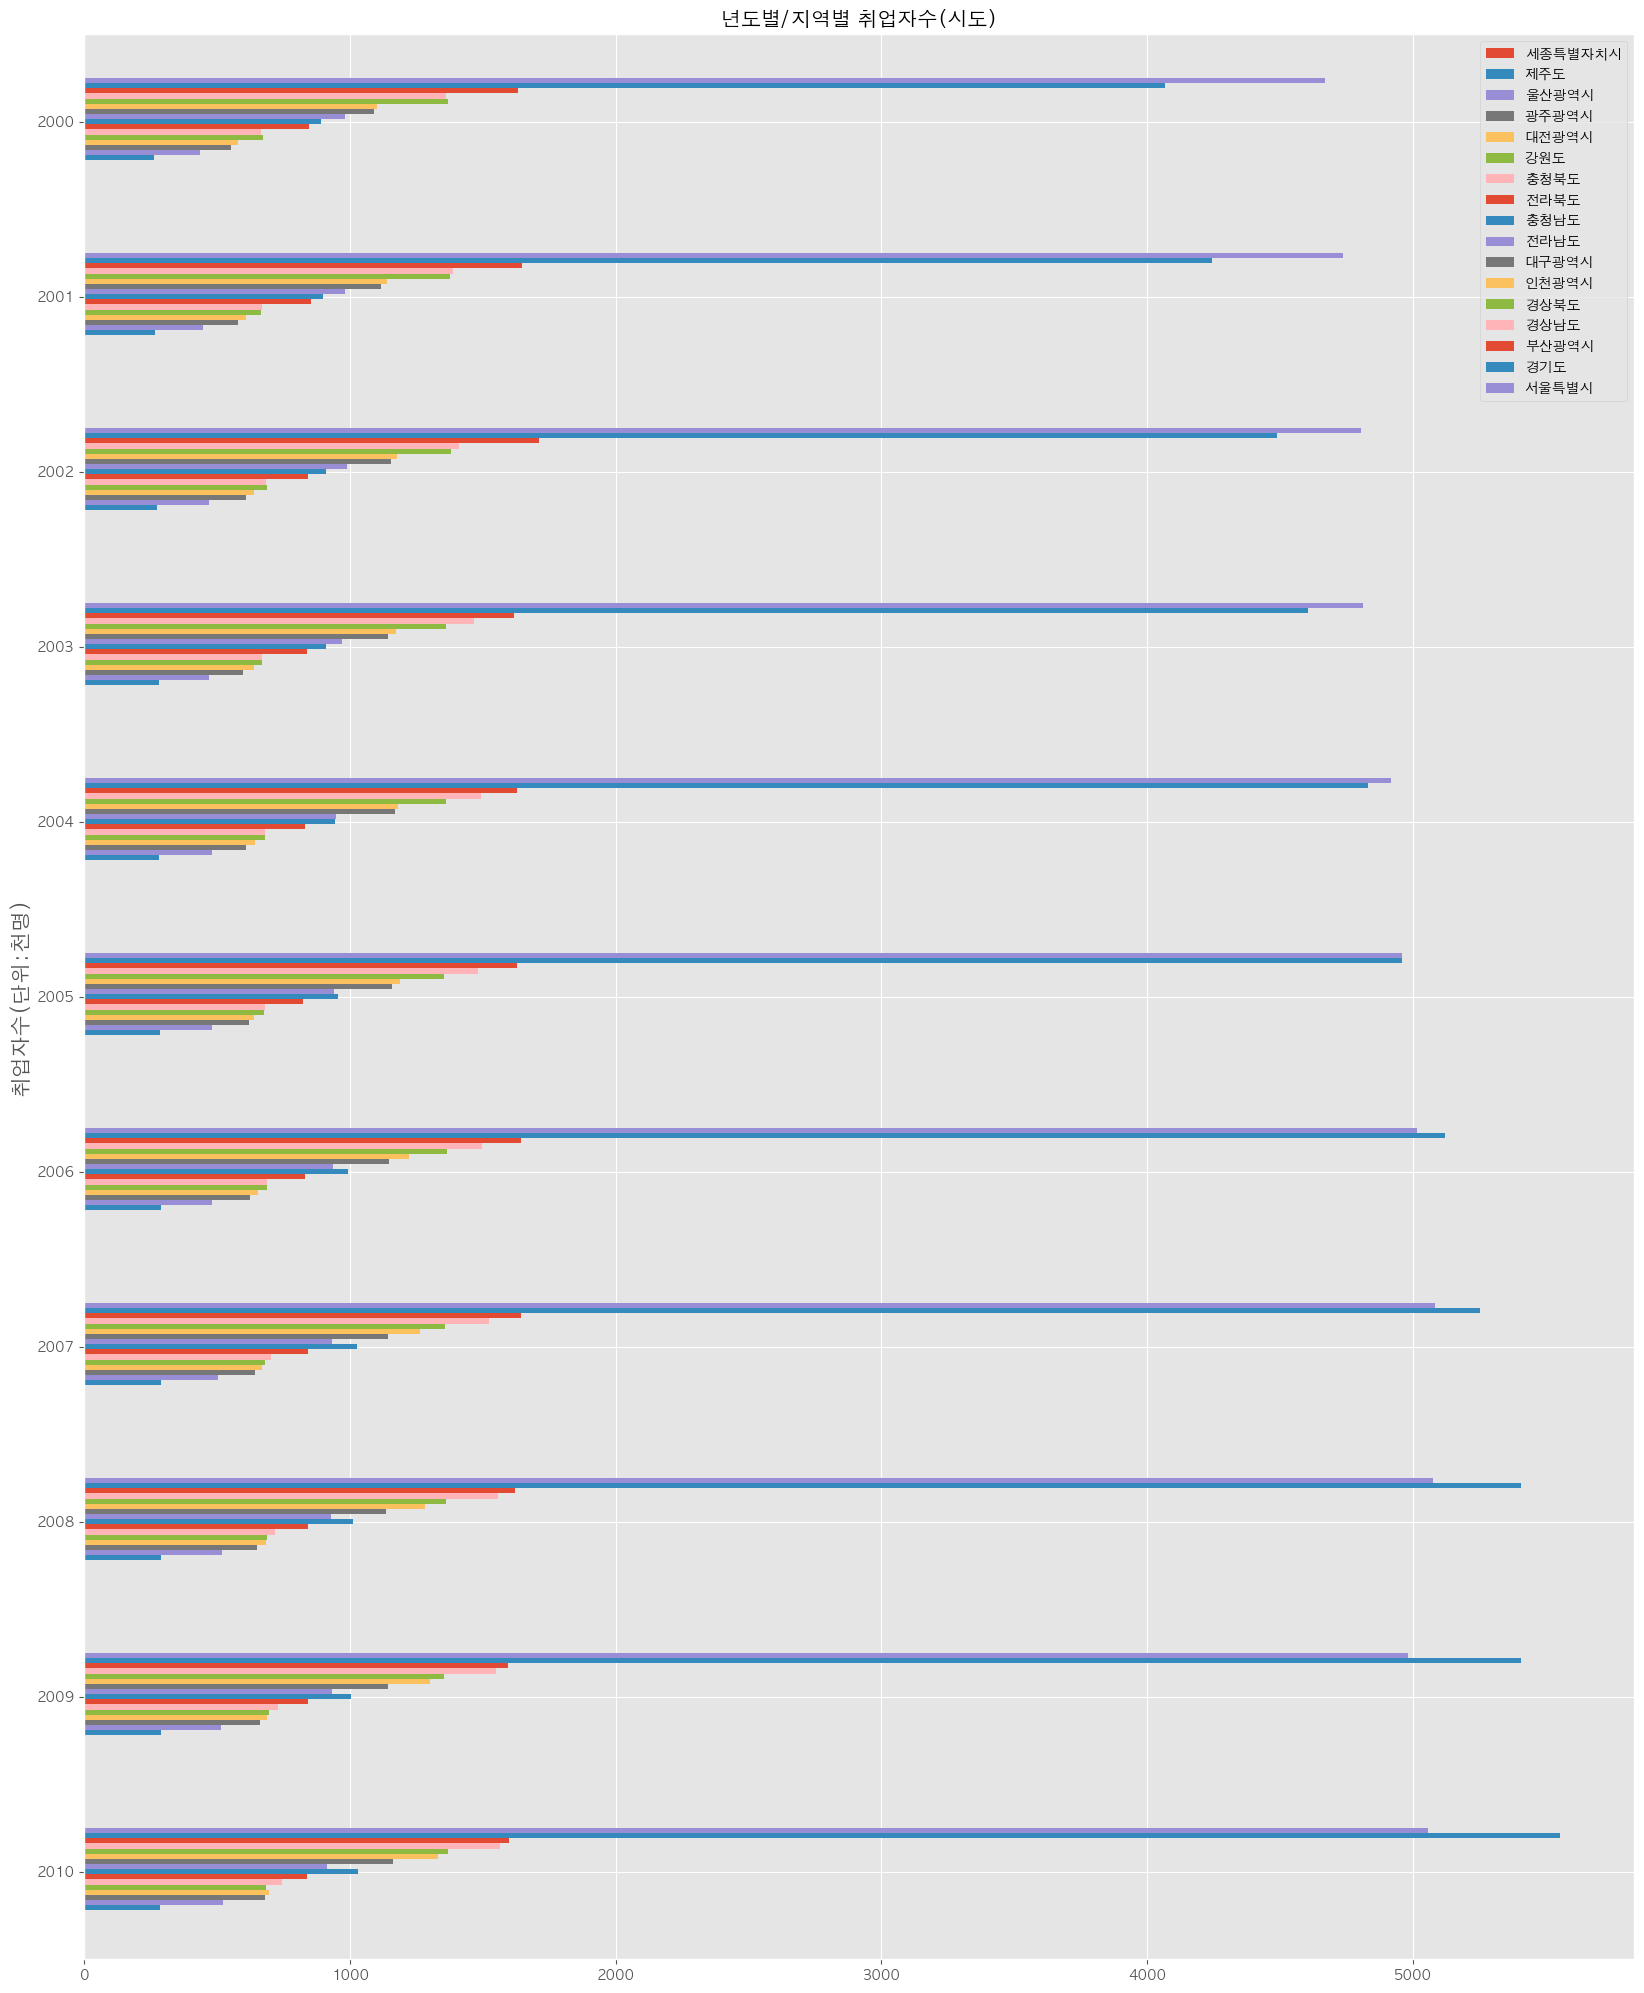

In [147]:
plt.style.use('ggplot')
emply_sidoT2010.plot(
    kind='barh', 
    figsize=(20,25),
    # color = terrain.colors,
    )

# plt.xticks(rotation="horizontal",size=10) # vertical은 90도
plt.ylabel("취업자수(단위:천명)", size=15)
plt.title('년도별/지역별 취업자수(시도)')

plt.show()

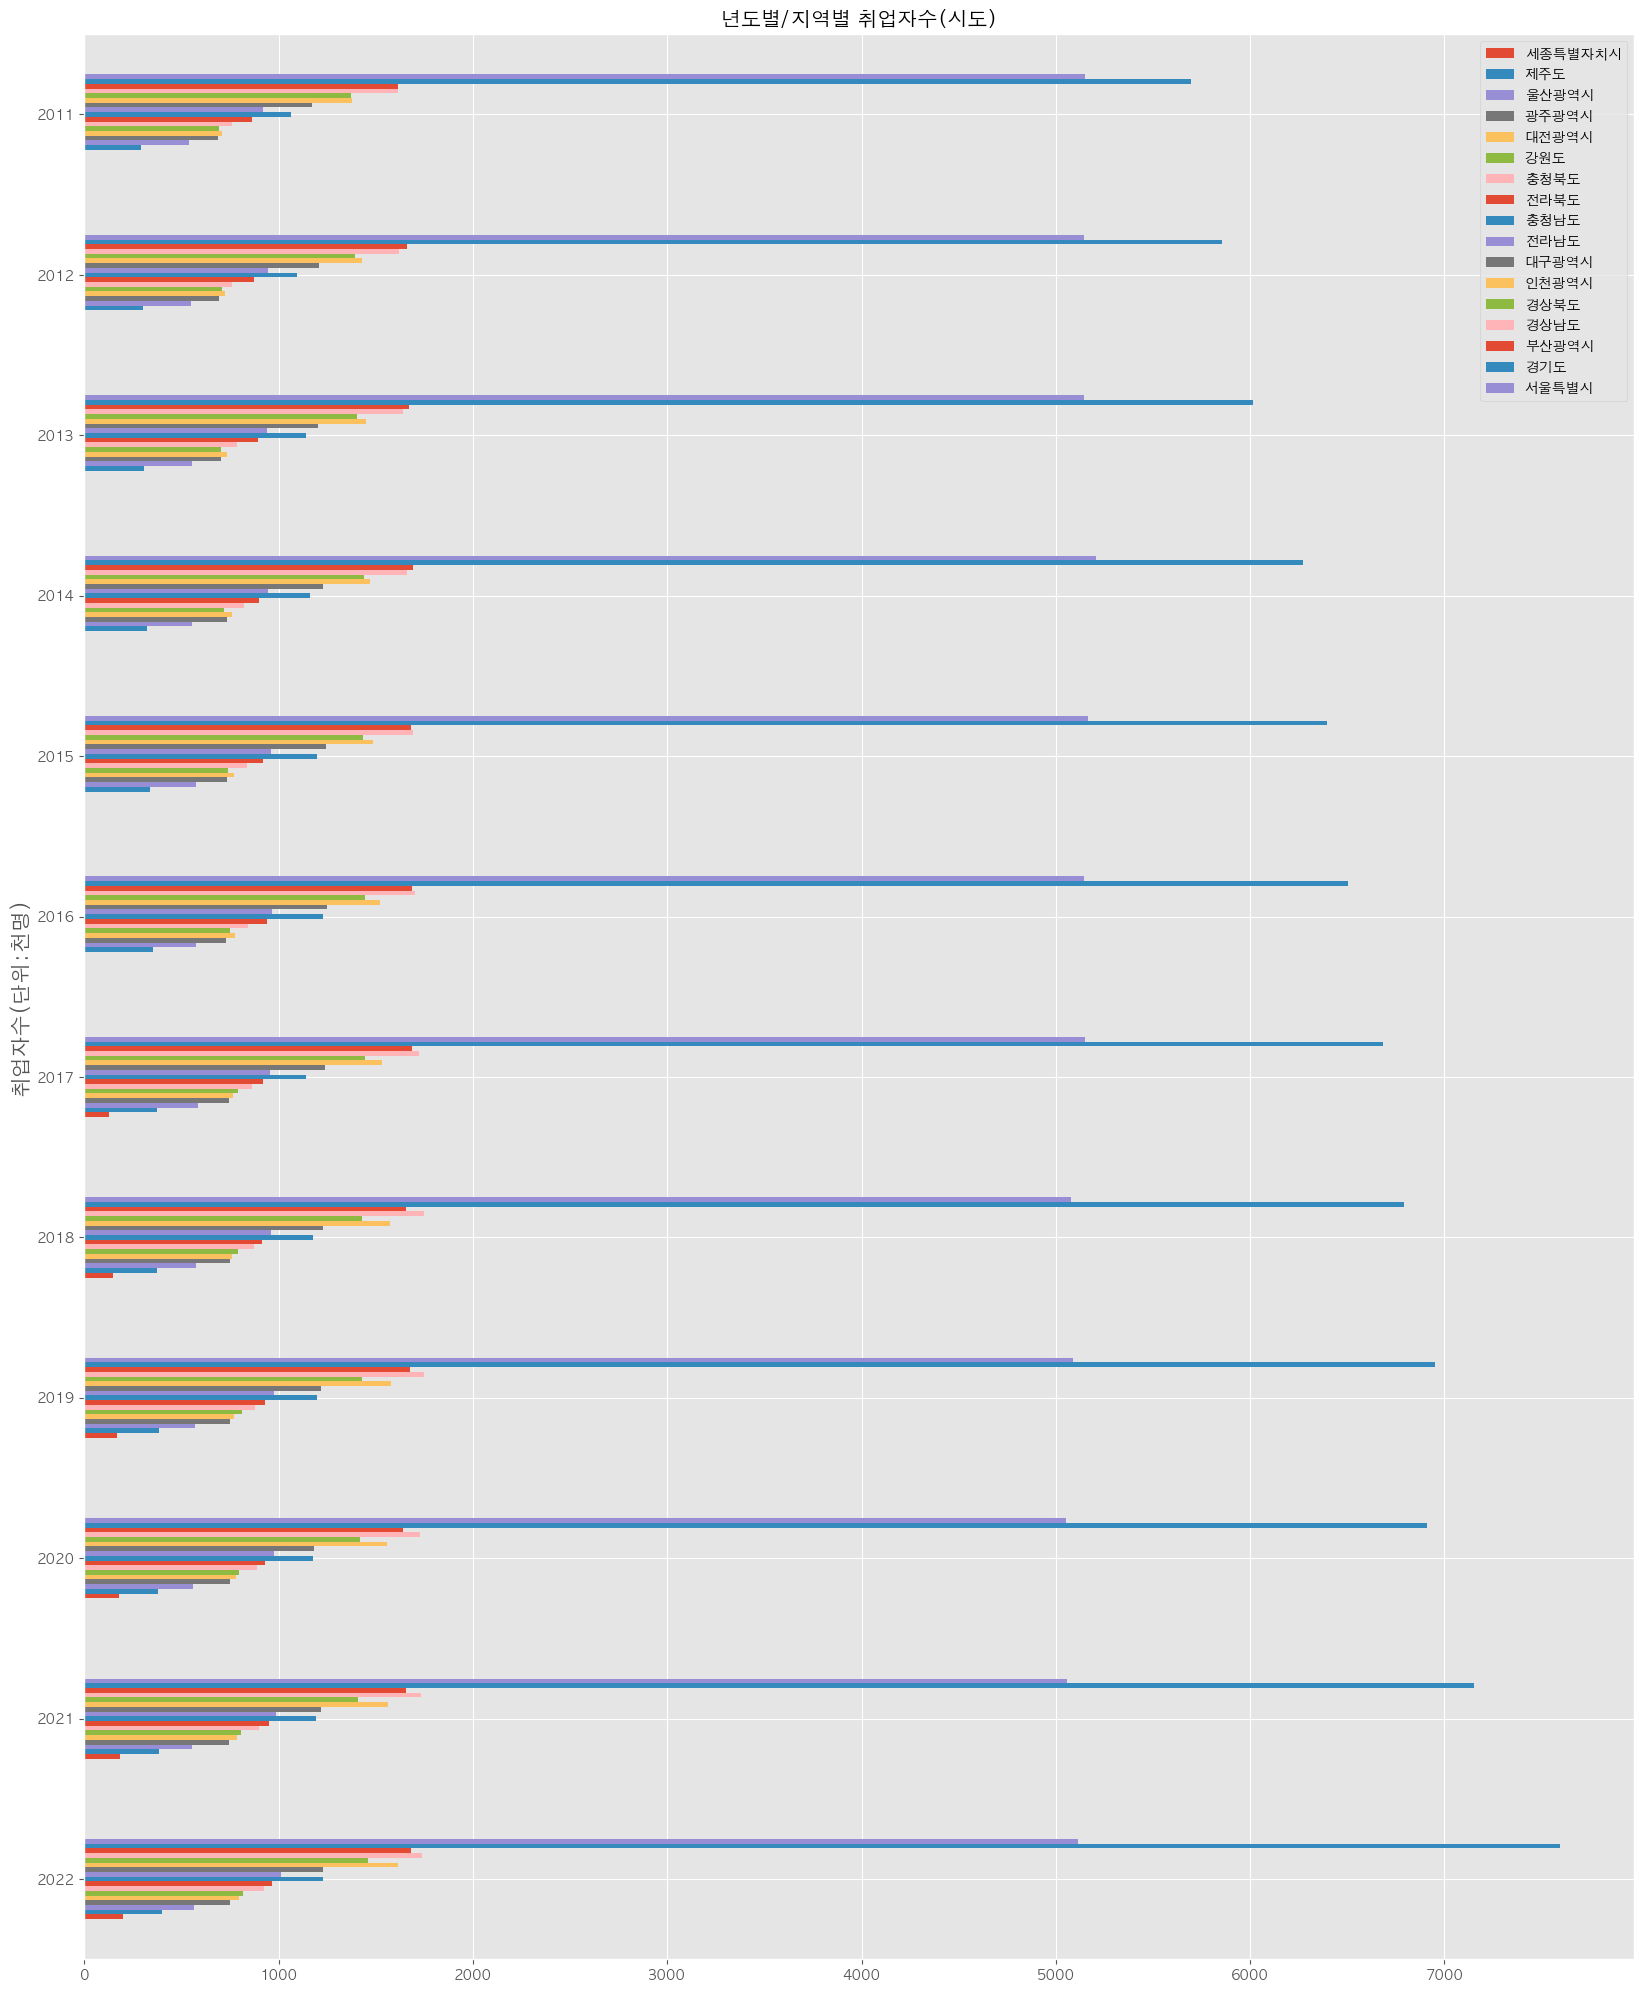

In [148]:
plt.style.use('ggplot')
emply_sidoT2022.plot(
    kind='barh', 
    figsize=(20,25),
    # color = terrain.colors,
    )

# plt.xticks(rotation="horizontal",size=10) # vertical은 90도
plt.ylabel("취업자수(단위:천명)", size=15)
plt.title('년도별/지역별 취업자수(시도)')
plt.show()

In [149]:
emply_sidoT

,세종특별자치시,제주도,울산광역시,광주광역시,대전광역시,강원도,충청북도,전라북도,충청남도,전라남도,대구광역시,인천광역시,경상북도,경상남도,부산광역시,경기도,서울특별시
시점,,,,,,,,,,,,,,,,,
2022,197,402,566,750,794,818,926,968,1226,1010,1228,1614,1462,1740,1679,7597,5113
2021,185,383,555,745,785,809,897,953,1193,985,1217,1563,1410,1732,1657,7150,5055
2020,180,378,560,748,780,795,890,932,1176,974,1184,1560,1418,1729,1640,6909,5051
2019,168,382,571,750,772,811,880,928,1196,974,1219,1581,1430,1749,1676,6952,5086
2018,148,372,574,749,759,789,876,915,1179,961,1226,1575,1427,1746,1657,6790,5080
2017,129,374,584,744,764,790,861,921,1140,957,1239,1533,1447,1723,1685,6685,5152
2016,0,355,576,730,774,749,845,940,1226,964,1247,1520,1443,1704,1686,6504,5146
2015,0,339,573,733,770,741,839,922,1199,962,1246,1488,1433,1691,1684,6393,5165
2014,0,322,556,732,762,721,823,901,1163,945,1227,1472,1441,1660,1693,6272,5209
